Exercício de Regressão Múltipla:

Previsão de Despesas com Base em Variáveis Financeiras

Imagine que você trabalhe em uma empresa financeira e precisa prever as despesas mensais de um cliente com base em suas receitas mensais e saldo bancário. Você deseja que seus alunos apliquem a regressão linear múltipla para construir um modelo de previsão.

Perguntas:

Adicione uma coluna de 1s à matriz X para representar o termo linear.
Calcule os coeficientes da regressão linear múltipla.
Escreva a equação da regressão linear múltipla.
Se um cliente tem Receitas Mensais de 6500 e Saldo Bancário de 3800, qual é a previsão para suas Despesas Mensais?

In [1]:
receitas_mensais = [
    6000,
    8000,
    5500,
    7000,
    7500,
    9000,
    6800,
    7200,
    6200,
    8500,
    5800,
    7500,
    8000,
    6700,
    7200,
    6300,
    8200,
    5700,
    7500,
    7900,
    6000,
    8300,
    6400,
    7100,
    6600,
    7800,
    5900,
    7400,
    7700,
    6100,
    8200,
]

saldo_bancario = [
    3500,
    4200,
    3000,
    3800,
    4000,
    4700,
    3600,
    3800,
    3400,
    4400,
    3100,
    3900,
    4300,
    3500,
    3700,
    3200,
    4200,
    3100,
    3900,
    4000,
    3300,
    4300,
    3400,
    3800,
    3600,
    4100,
    3100,
    3800,
    4000,
    3200,
    4200,
]

despesas_mensais = [
    2800,
    3200,
    2500,
    2900,
    3100,
    3500,
    2800,
    3000,
    2700,
    3300,
    2600,
    3100,
    3200,
    2800,
    2900,
    2600,
    3300,
    2500,
    3100,
    3000,
    2700,
    3400,
    2800,
    3000,
    2900,
    3200,
    2600,
    3000,
    3100,
    2600,
    3300,
]

In [2]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
X = np.array([receitas_mensais, saldo_bancario]).T

# Adicionar coluna de 1s para o termo linear
X = np.column_stack((np.ones(len(X)), X))

Y = np.array(despesas_mensais).reshape(-1, 1)

# Calcular os coeficientes usando a fórmula dos mínimos quadrados (X'X)^{-1}X'y
coeficientes = np.linalg.inv(X.T @ X) @ X.T @ Y

In [4]:
coeficientes

array([[7.08544726e+02],
       [4.65077905e-02],
       [5.10795862e-01]])

In [5]:
despesas_estimadas = X @ coeficientes

In [6]:
np.array(despesas_mensais) - np.array(despesas_estimadas).T[0]

array([  24.62301387,  -25.94967065,    3.27484016,  -75.12353529,
         -0.53660297,  -27.85539221,  -63.66280477,   15.57490661,
        -33.59895804,  -51.36273832,   38.2429168 ,   50.54298324,
        -77.02925685,   -7.93243951,  -33.34550719,  -36.09056468,
         64.74877125,  -57.10630415,   50.54298324, -119.13971918,
         26.78218628,  109.01840599,   57.09948386,   20.22568566,
         45.63875334,   34.43147367,   33.59213774,    6.2733485 ,
         -9.83816107,  -26.78900657,   64.74877125])

In [8]:
# componente de horas de estudos na variancia de notas
var_receitas_mensais = (coeficientes[1] ** 2) * (np.var(receitas_mensais))
var_receitas_mensais

# componente de saldo_bancario na variancia de notas
var_saldo_bancario = (coeficientes[2] ** 2) * (np.var(saldo_bancario))
var_saldo_bancario

# componente de residuos na variancia de notas
residuo = np.array(despesas_mensais) - np.array(despesas_estimadas).T[0]
var_residuos = np.var(residuo)

print(
    "E_var_despesas_mensais: ",
    var_receitas_mensais + var_saldo_bancario + var_residuos,
    ", var_despesas_mensais: ",
    np.var(despesas_mensais),
)

E_var_despesas_mensais:  [54514.73506537] , var_despesas_mensais:  73465.14047866807


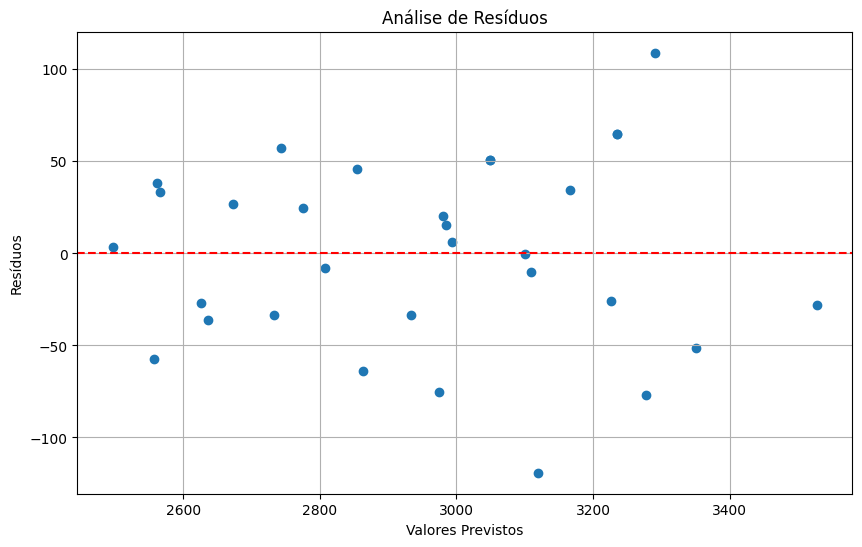

In [9]:
# Calcular os resíduos
residuos = Y - despesas_estimadas

# Plotar gráfico de resíduos versus valores previstos
plt.figure(figsize=(10, 6))
plt.scatter(despesas_estimadas, residuos)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Valores Previstos")
plt.ylabel("Resíduos")
plt.title("Análise de Resíduos")
plt.grid()
plt.show()

Faça o mesmo exercício anterior usando o statsmodels

In [11]:

despesas = pd.DataFrame(
    {"saldo_bancario": saldo_bancario, "receitas_mensais": receitas_mensais, "despesas_mensais": despesas_mensais}
)

# Adicionando uma coluna de 1s (termo linear) ao DataFrame
despesas = sm.add_constant(despesas)

# Definindo as variáveis independentes (X) e a variável dependente (y)
X = despesas.drop(
    "despesas_mensais", axis=1
)  # Excluindo a coluna para obter as variáveis independentes (features)
y = despesas.despesas_mensais  # Definindo a variável dependente (target ou alvo)

# Criando o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Exibindo um resumo da análise de regressão
print(model.summary())

# Fazendo uma previsão com o modelo usando os dados da primeira linha
previsao_primeira_linha = model.predict(X.head(1))
print("y estimado para 1a linha:", previsao_primeira_linha)

                            OLS Regression Results                            
Dep. Variable:       despesas_mensais   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     394.2
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           3.12e-21
Time:                        10:59:25   Log-Likelihood:                -165.38
No. Observations:                  31   AIC:                             336.8
Df Residuals:                      28   BIC:                             341.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              708.5447     89.210  

Calcule o coeficiente de determinação R2 da regressão múltipla

In [12]:
SQE = sum((despesas_estimadas - np.mean(despesas_estimadas)) ** 2)
SQT = sum((despesas_mensais - np.mean(despesas_mensais)) ** 2)

R2 = SQE / SQT

print(R2)

[0.96569895]


Variância dos coeficientes estimados

In [13]:
var_resid = model.resid.var()
dp_coeficientes = np.diag(var_resid * np.linalg.inv(X.T @ X)) ** 0.5

print(dp_coeficientes)

[8.61849576e+01 1.08775747e-01 5.14270564e-02]


Limites inferior e superior dos coeficientes

In [14]:
IC_inferior = coeficientes[0] - 1.96 * dp_coeficientes[0]
IC_superior = coeficientes[0] + 1.96 * dp_coeficientes[0]
print("IC_inferior_alfa:", IC_inferior, ", IC_superior_alfa:", IC_superior)

IC_inferior = coeficientes[1] - 1.96 * dp_coeficientes[1]
IC_superior = coeficientes[1] + 1.96 * dp_coeficientes[1]
print(
    "IC_inferior_horas_estudo:", IC_inferior, ", IC_superior_horas_estudo:", IC_superior
)

IC_inferior = coeficientes[2] - 1.96 * dp_coeficientes[2]
IC_superior = coeficientes[2] + 1.96 * dp_coeficientes[2]
print("IC_inferior_exercicios:", IC_inferior, ", IC_superior_exercicios:", IC_superior)

IC_inferior_alfa: [539.62220876] , IC_superior_alfa: [877.46724267]
IC_inferior_horas_estudo: [-0.16669267] , IC_superior_horas_estudo: [0.25970826]
IC_inferior_exercicios: [0.40999883] , IC_superior_exercicios: [0.61159289]
